In [15]:
from src.shared_imports import *

plt.style.use("seaborn-v0_8")

In [16]:
df = pd.read_csv("data/processed/gen_sen_merged.csv")

In [17]:
df.columns
df = df.drop(['HOUR_x', 'DATE_x'], axis=1)

In [18]:
df.head()

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,INVERTER_EFF,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,NaN,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,NaN,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,NaN,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,NaN,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,NaN,25.184316,22.857507,0.0


Normalized Performance Ratio
NPR = AC_POWER / IRRADIATION

In [19]:
df["NPR"] = df["AC_POWER"] / df["IRRADIATION"]

In [20]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
df["HOUR"] = df["DATE_TIME"].dt.hour
df["DATE"] = df["DATE_TIME"].dt.date

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68778 non-null  datetime64[ns]
 1   SOURCE_KEY_x         68778 non-null  object        
 2   DC_POWER             68778 non-null  float64       
 3   AC_POWER             68778 non-null  float64       
 4   DAILY_YIELD          68778 non-null  float64       
 5   TOTAL_YIELD          68778 non-null  float64       
 6   INVERTER_EFF         36827 non-null  float64       
 7   AMBIENT_TEMPERATURE  68774 non-null  float64       
 8   MODULE_TEMPERATURE   68774 non-null  float64       
 9   IRRADIATION          68774 non-null  float64       
 10  NPR                  38376 non-null  float64       
 11  HOUR                 68778 non-null  int32         
 12  DATE                 68778 non-null  object        
dtypes: datetime64[ns](1), float64(9

### Daily NPR（按天的性能表现）

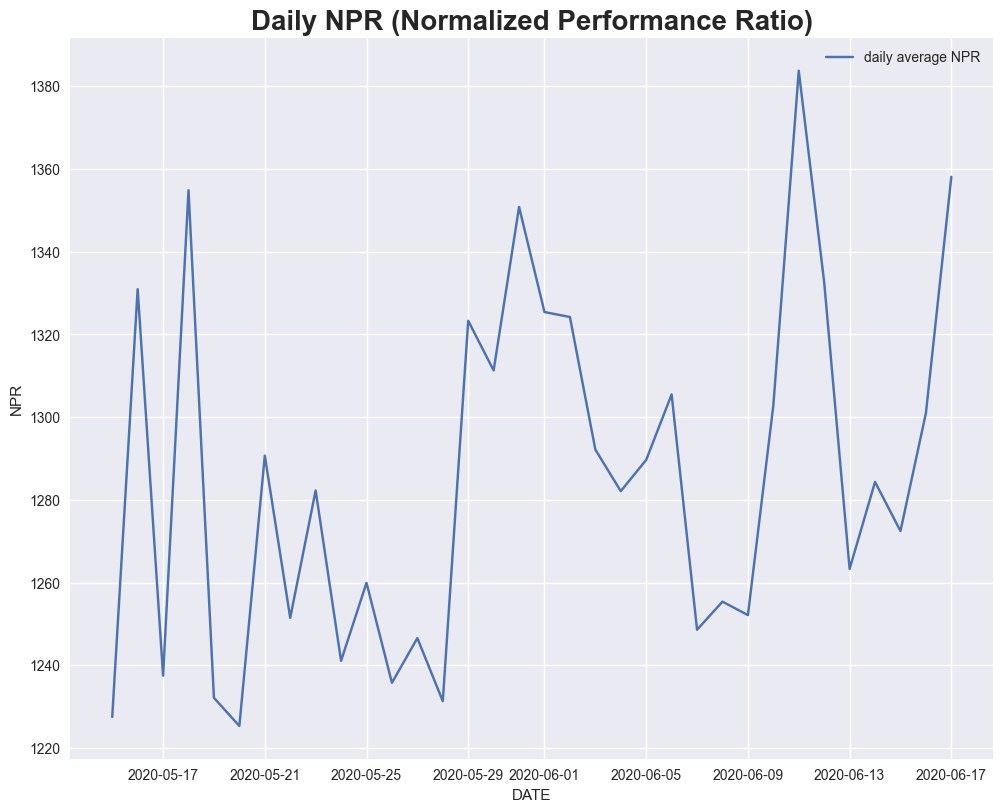

In [22]:
df_copy = df.copy()
df_copy.groupby(["DATE"])["NPR"].mean().plot(figsize=(10,8))

plt.tight_layout()
plt.title("Daily NPR (Normalized Performance Ratio)", weight="bold", fontsize=20)
plt.ylabel("NPR")
plt.grid(True)
plt.legend(["daily average NPR"])

Hourly NPR（按小时性能表现）

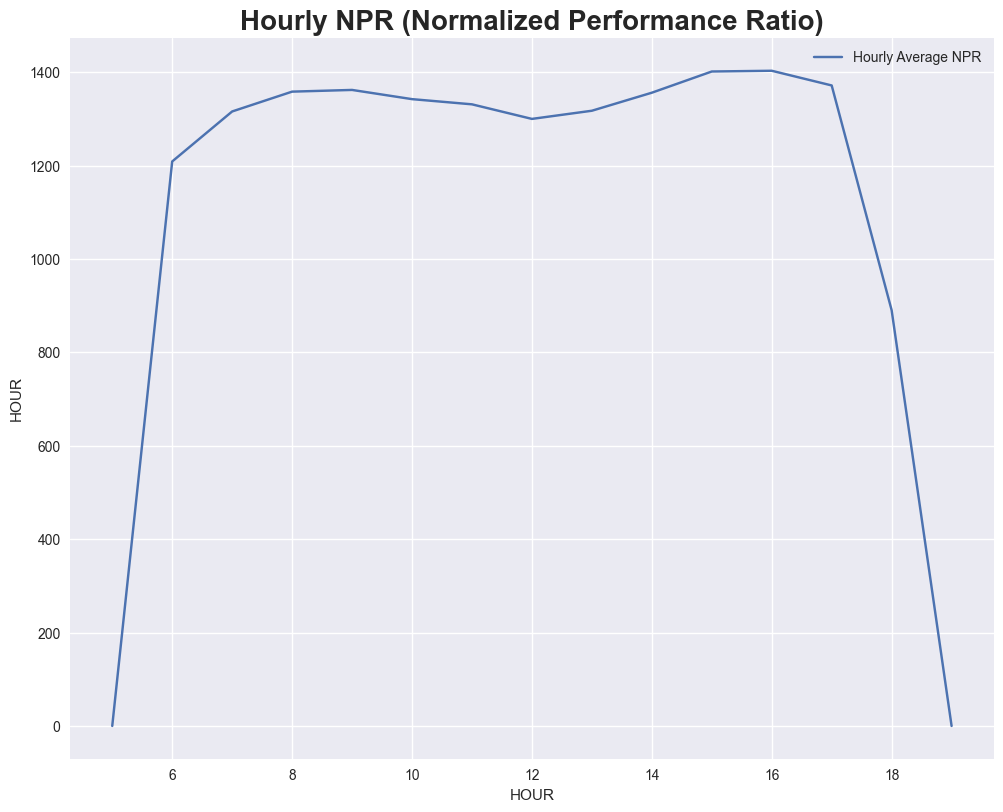

In [23]:
df_copy = df.copy()
df_copy.groupby(["HOUR"])["NPR"].mean().plot(figsize=(10,8))

plt.tight_layout()
plt.title("Hourly NPR (Normalized Performance Ratio)", weight="bold", fontsize=20)
plt.ylabel("HOUR")
plt.grid(True)
plt.legend(["Hourly Average NPR"])

可以看到中午12点左右的时候有下降一些，可能有逆变器降额（derating）或热衰减（thermal derating）

### Inverter-level NPR

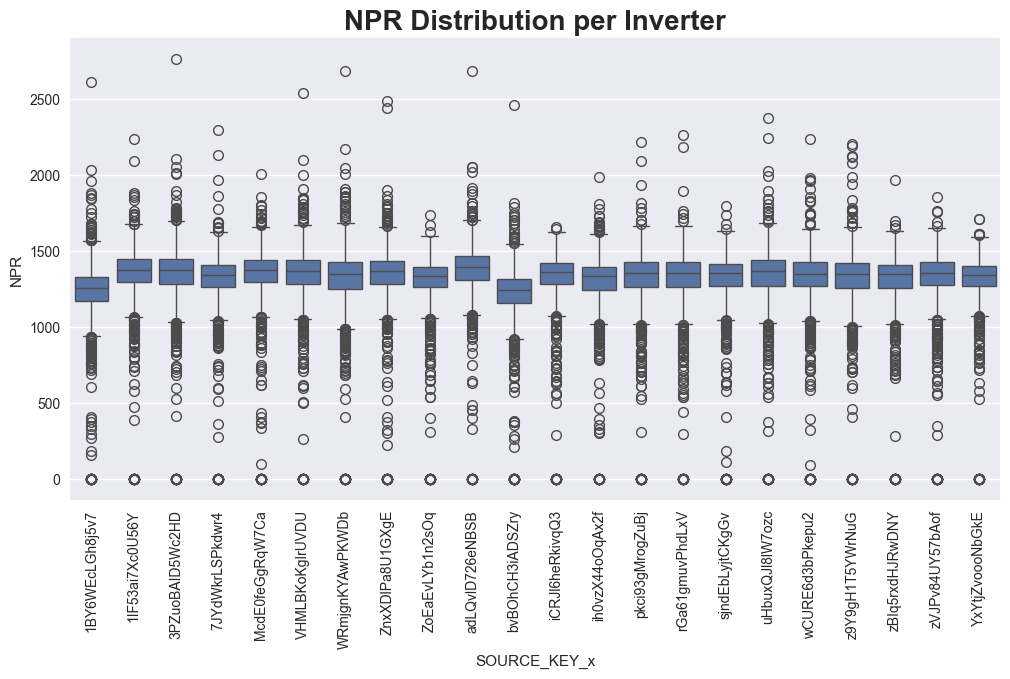

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_copy, x="SOURCE_KEY_x", y="NPR")
plt.title("NPR Distribution per Inverter", weight="bold", fontsize=20)
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.show()


### 各逆变器随时间的 NPR

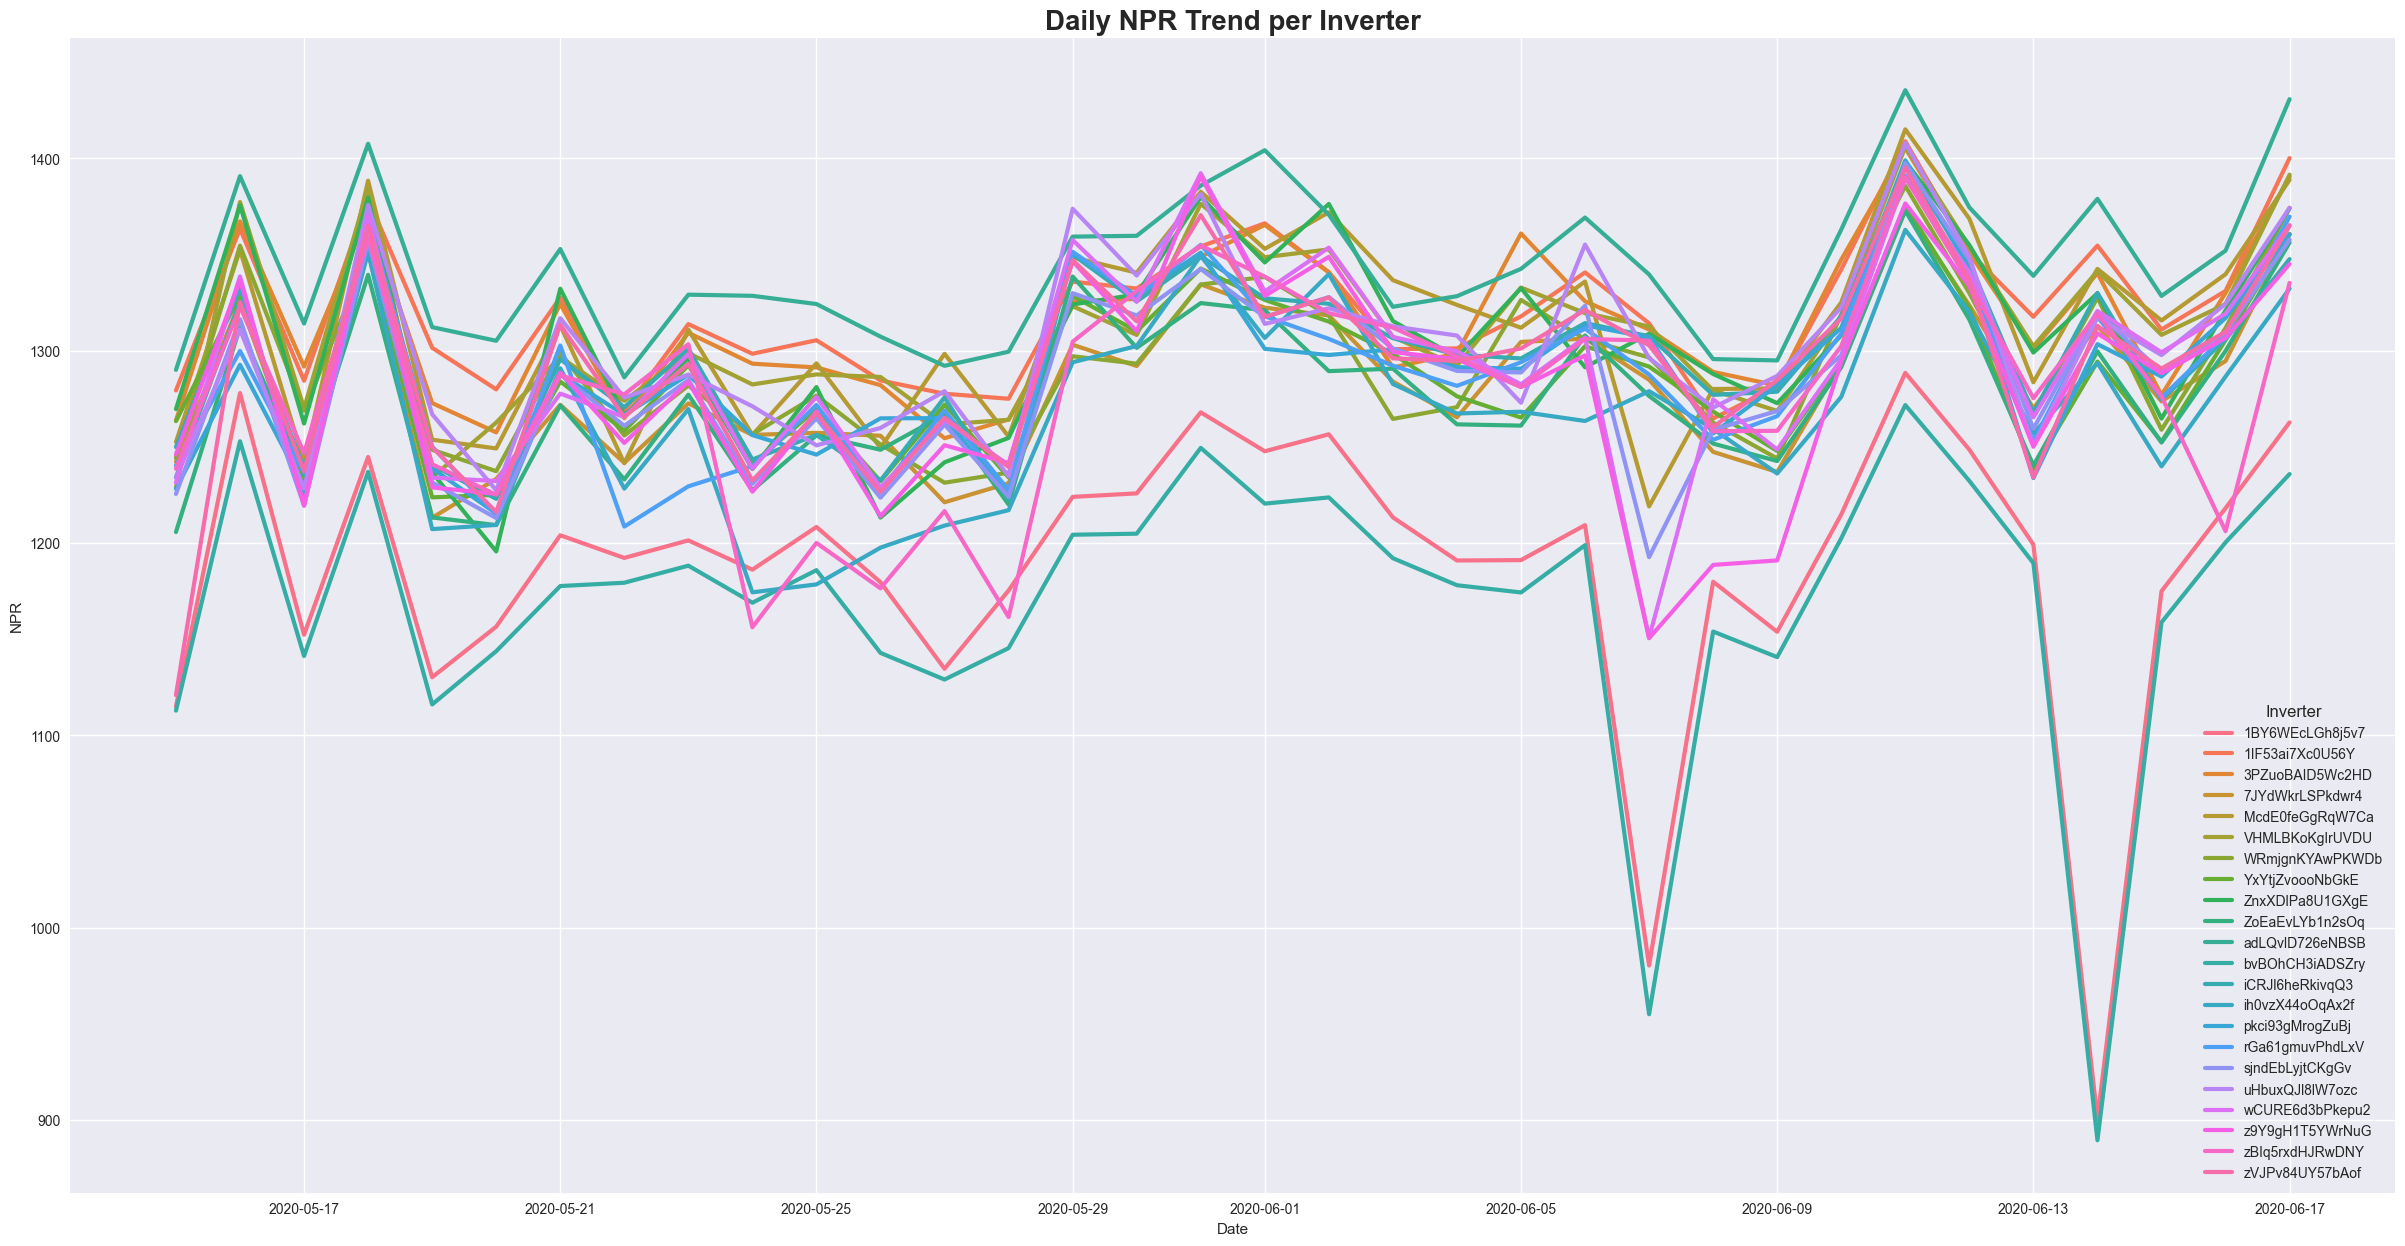

<Figure size 800x550 with 0 Axes>

In [25]:
inv_daily_npr = df.groupby(["SOURCE_KEY_x", "DATE"])["NPR"].mean().reset_index()

plt.figure(figsize=(30,15))
sns.lineplot(data=inv_daily_npr, x="DATE", y="NPR", hue="SOURCE_KEY_x", linewidth=3)
plt.title("Daily NPR Trend per Inverter", weight="bold", fontsize=20)
plt.xlabel("Date")
plt.ylabel("NPR")
plt.legend(title="Inverter")
plt.grid(True)
plt.show()
plt.tight_layout()


NPR vs Temperature (热衰减分析)

In [26]:
df.head()

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,INVERTER_EFF,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,NPR,HOUR,DATE
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,NaN,25.184316,22.857507,0.0,NaN,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,NaN,25.184316,22.857507,0.0,NaN,0,2020-05-15
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,NaN,25.184316,22.857507,0.0,NaN,0,2020-05-15
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,NaN,25.184316,22.857507,0.0,NaN,0,2020-05-15
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,NaN,25.184316,22.857507,0.0,NaN,0,2020-05-15


C:\Users\pearl\AppData\Local\Temp\ipykernel_26616\1886655640.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bins_mean = df_copy.groupby("temp_bins")["NPR"].mean()


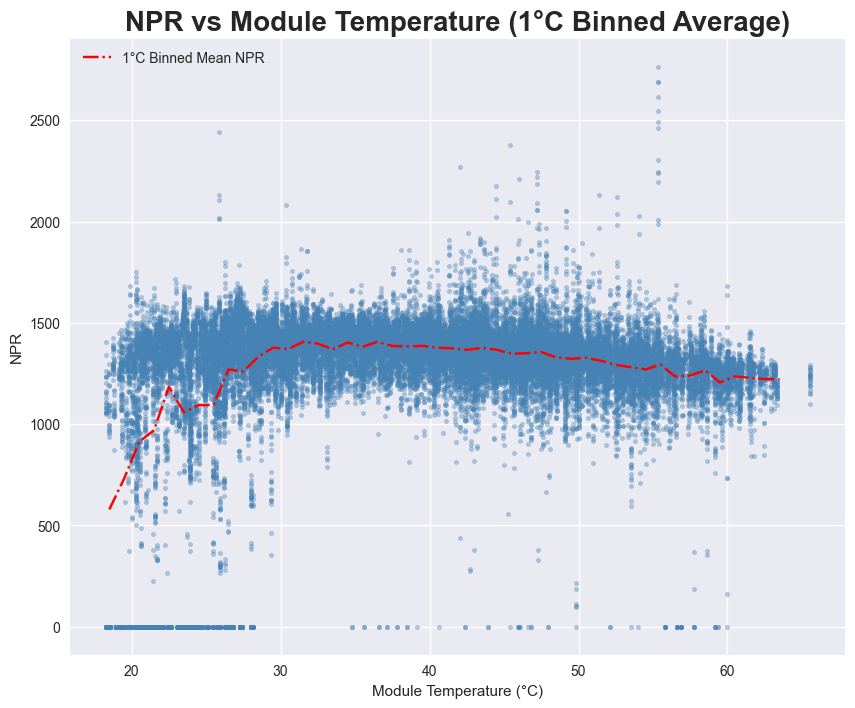

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df_copy["MODULE_TEMPERATURE"], df_copy["NPR"], s=10, color="steelblue", alpha=0.4)

temp_max = int(df_copy["MODULE_TEMPERATURE"].max())
temp_min = int(df_copy["MODULE_TEMPERATURE"].min())

bins = np.arange(temp_min, temp_max+2, 1)

df_copy["temp_bins"] = pd.cut(df_copy["MODULE_TEMPERATURE"], bins=bins)
temp_bins_mean = df_copy.groupby("temp_bins")["NPR"].mean()

bin_centers = np.array([interval.left+0.5 for interval in temp_bins_mean.index])

plt.plot(bin_centers, temp_bins_mean.values, color="red", linestyle="-.", label="1°C Binned Mean NPR")


plt.title("NPR vs Module Temperature (1°C Binned Average)", fontsize=20, weight="bold")
plt.xlabel("Module Temperature (°C)")
plt.ylabel("NPR")
plt.grid(True)
plt.legend()
plt.show()

我们可以看到温度越高平均线有下降趋势，特别是超过50度后更显著，说明系统存在热衰减，是光伏运维中的工程问题